# Timelapse processing

This notebook shows how to use the `frame_by_frame` function to process timelapse data of points and surfaces for functions in- or outside the `napari-stress` plugin.

In [1]:
import vedo
import napari_stress
import napari_process_points_and_surfaces as nppas
import numpy as np

import napari

napari.manifest -> 'napari' could not be imported: Could not find file 'builtins.yaml' in module 'napari'


First, we need some synthetic data. For this, we create a list of spheres and add some noise to the vertex positions.

In [2]:
spheres = [[vedo.Sphere(pos=(10, 10, 10), r=5).vertices, np.asarray(vedo.Sphere().cells)] for k in range(10)]

for sphere in spheres:
    sphere[0] += np.random.normal(scale=0.1, size = spheres[0][0].shape)

As it is, this object cannot be added to Napari. To make it Napari-compliant, we have to convert the list with the frames into a single object. the `Converter` class allows to do this:

In [3]:
Converter = napari_stress.TimelapseConverter()
spheres_data = Converter.list_of_data_to_data(spheres, layertype=napari.types.SurfaceData)

napari.manifest -> 'napari' could not be imported: Could not find file 'builtins.yaml' in module 'napari'


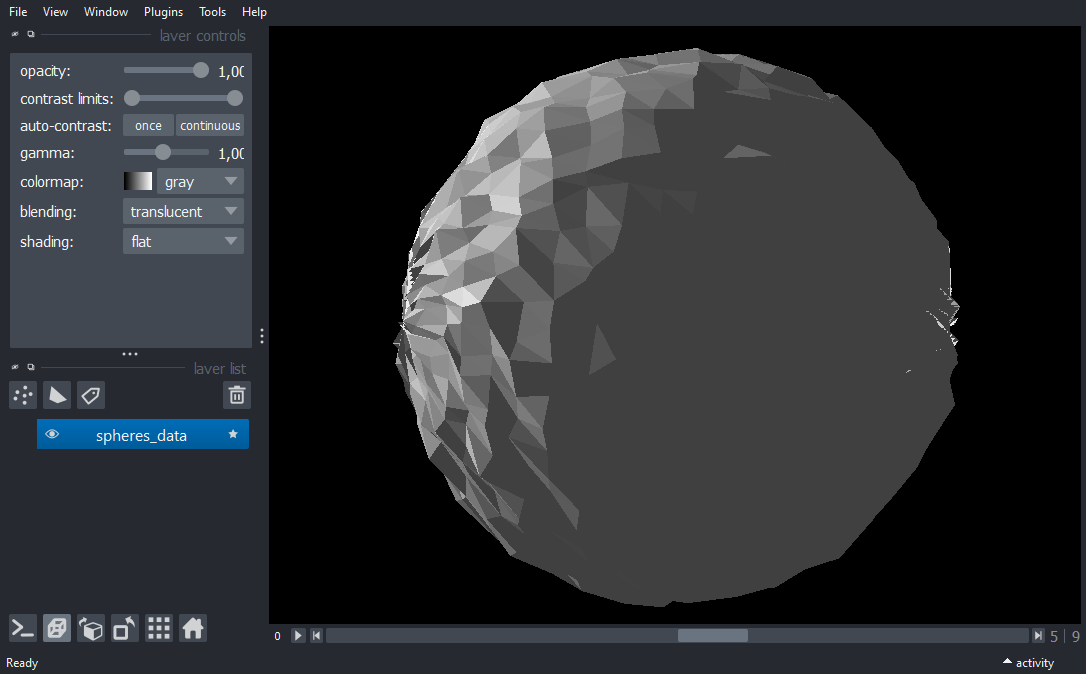

In [4]:
viewer = napari.Viewer(ndisplay=3)
layer = viewer.add_surface(spheres_data)
napari.utils.nbscreenshot(viewer)

## Apply functions to timelapse data

Surface/Points data can be processed either by adding the `frame_by_frame` decorator to the function in your own code or by wrapping it around functions from other repositories. In order to smooth the sphere we created, we could use the `filter_smooth_simple` function from [napari-process-points-and-surfaces](https://github.com/haesleinhuepf/napari-process-points-and-surfaces):

In [5]:
spheres_smoothed = napari_stress.frame_by_frame(nppas.filter_smooth_simple)(spheres_data, number_of_iterations = 1)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


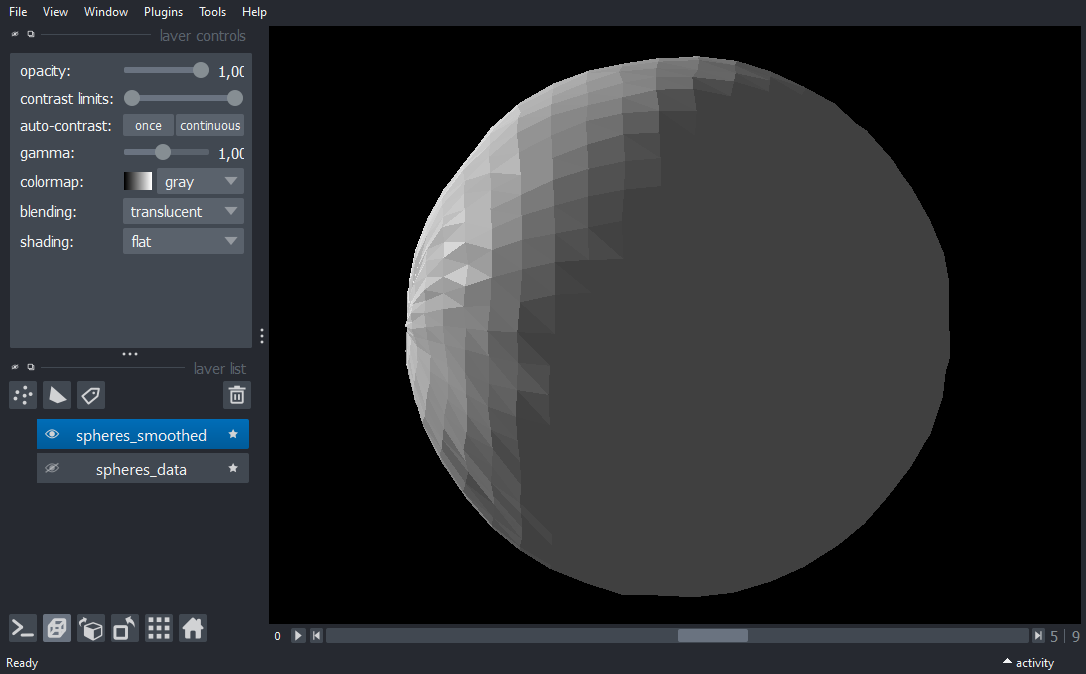

In [6]:
layer.visible = False
viewer.add_surface(spheres_smoothed)
napari.utils.nbscreenshot(viewer)

## Using other datatypes

Sometimes we want to retrieve some measurements from an obect rather than just transform it into a different object (i.e., filter it). The `frame_by_frame` functionality, supports this, too. Suppose we want to measure an intensity on the surface of these spheres. Let's create some dummy intensity data:

In [7]:
random_intensity = np.random.random((len(spheres), 20, 20, 20))
random_intensity.shape

(10, 20, 20, 20)

We now measure the intensity along normal vectors at every vertex position. What we get is a list of intensity values for every vertex position. To see how to caclulate the mean intensity per frame, see these notebook [for vectors](demo_notebooks:measurement:intensity_on_surfaces) or [surfaces](demo_notebooks:measurement:intensity_on_vectors).

In [ ]:
results = napari_stress.frame_by_frame(napari_stress.measurements.measure_intensity_on_surface)(spheres_smoothed, random_intensity)
results